# Importing necessary packages

In [1]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os

Test-1<br>
Channel Arrangement: Bearing 1 – Ch 1&2; Bearing 2 – Ch 3&4;Bearing 3 – Ch 5&6; Bearing 4 – Ch 7&8.<br>
At the end of the test-to-failure experiment, inner race defect occurred in bearing 3 and roller element defect in bearing 4.

# Loading feature engineered set1 data

In [14]:
test_no=1

df1 = pd.read_csv("Time_feature_matrix_bearing_1_Test_ {}.csv".format(test_no),index_col='Unnamed: 0')
df2 = pd.read_csv("Time_feature_matrix_bearing_2_Test_ {}.csv".format(test_no),index_col='Unnamed: 0')
df3 = pd.read_csv("Time_feature_matrix_bearing_3_Test_ {}.csv".format(test_no),index_col='Unnamed: 0')
df4 = pd.read_csv("Time_feature_matrix_bearing_4_Test_ {}.csv".format(test_no),index_col='Unnamed: 0')

df1.index = pd.to_datetime(df1.index)
df2.index = pd.to_datetime(df2.index)
df3.index = pd.to_datetime(df3.index)
df4.index = pd.to_datetime(df4.index)

In [12]:
df1.columns

Index(['Max', 'Min', 'Mean', 'Std', 'RMS', 'Skewness', 'Kurtosis',
       'Crestfactor', 'Formfactor'],
      dtype='object')

In [10]:
df1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crestfactor,Formfactor
2003-10-22 12:06:13,0.5445,-0.6420,-0.094240,0.075888,0.121056,0.095150,2.067108,4.539861,-1.284433
2003-10-22 12:09:13,0.4845,-0.5725,-0.094397,0.074526,0.120323,0.028208,1.580649,4.053328,-1.274489
2003-10-22 12:14:13,0.4330,-0.5460,-0.096027,0.074843,0.121818,0.054776,1.477128,3.584151,-1.268523
2003-10-22 12:19:13,0.4960,-0.5360,-0.095462,0.076048,0.122104,0.052409,1.389413,4.072842,-1.279029
2003-10-22 12:24:13,0.3870,-0.5800,-0.095312,0.077093,0.122650,0.017957,1.145527,3.156974,-1.286894
...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:32,0.4835,-0.6285,-0.117679,0.110586,0.161664,0.032343,0.457040,2.998355,-1.373847
2003-11-25 23:13:21,0.5850,-0.7130,-0.116973,0.118003,0.166344,0.000369,0.691039,3.548822,-1.421821
2003-11-25 23:19:56,0.5065,-0.6625,-0.117725,0.116677,0.165936,-0.021398,0.454885,3.078755,-1.409191
2003-11-25 23:29:56,0.5795,-0.7105,-0.118583,0.116506,0.166413,0.012122,0.526256,3.503211,-1.403520


In [11]:
df2

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crestfactor,Formfactor
2003-10-22 12:06:13,0.3075,-0.6020,-0.093783,0.084081,0.126048,-0.072639,0.250553,2.428229,-1.344031
2003-10-22 12:09:13,0.2665,-0.6350,-0.095346,0.083502,0.126835,-0.067273,0.260123,2.096884,-1.330136
2003-10-22 12:14:13,0.3125,-0.5225,-0.096390,0.083668,0.127737,-0.060555,0.190731,2.442257,-1.325298
2003-10-22 12:19:13,0.2650,-0.5405,-0.095875,0.083404,0.127183,-0.078118,0.254000,2.080385,-1.326596
2003-10-22 12:24:13,0.3075,-0.6480,-0.095592,0.082456,0.126324,-0.068185,0.300469,2.425638,-1.321341
...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:32,0.5030,-0.6895,-0.117043,0.132473,0.177036,0.043485,0.367636,2.846547,-1.512693
2003-11-25 23:13:21,0.5215,-0.8030,-0.116492,0.153499,0.192812,-0.001550,0.354504,2.704259,-1.655186
2003-11-25 23:19:56,0.6400,-0.8300,-0.118243,0.160616,0.199538,0.011211,0.476280,3.194528,-1.687487
2003-11-25 23:29:56,0.4635,-0.9055,-0.118202,0.151962,0.192548,-0.017374,0.226202,2.411408,-1.628976


In [5]:
df3

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crestfactor,Formfactor
2003-10-22 12:06:13,0.4075,-0.6400,-0.090845,0.093478,0.130355,0.006031,0.590766,3.125838,-1.434909
2003-10-22 12:09:13,0.4550,-0.5710,-0.091926,0.093061,0.130808,-0.013806,0.563618,3.481456,-1.422939
2003-10-22 12:14:13,0.3750,-0.6105,-0.094184,0.092936,0.132317,0.036293,0.569809,2.834873,-1.404854
2003-10-22 12:19:13,0.3370,-0.6180,-0.092956,0.094447,0.132525,-0.016088,0.464376,2.541983,-1.425674
2003-10-22 12:24:13,0.4515,-0.5750,-0.093597,0.093492,0.132296,0.001123,0.400252,3.414102,-1.413484
...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:32,2.4230,-2.2410,-0.114932,0.254592,0.279337,0.007321,3.228264,8.704759,-2.430736
2003-11-25 23:13:21,4.4410,-4.8265,-0.112570,0.462086,0.475609,-0.038732,9.264917,9.304245,-4.224163
2003-11-25 23:19:56,4.8130,-4.6340,-0.110224,0.498851,0.510923,0.086496,9.010985,9.428550,-4.642655
2003-11-25 23:29:56,3.8975,-4.4820,-0.115965,0.452038,0.466665,-0.099656,7.600642,8.339162,-4.023927


In [6]:
df4

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crestfactor,Formfactor
2003-10-22 12:06:13,0.3115,-0.4420,-0.092600,0.063235,0.112143,0.027366,1.298672,2.764333,-1.210828
2003-10-22 12:09:13,0.3245,-0.5235,-0.089604,0.062085,0.109055,0.015713,1.553352,2.976240,-1.217528
2003-10-22 12:14:13,0.3185,-0.4985,-0.092851,0.062613,0.112008,0.028345,1.176654,2.836464,-1.206278
2003-10-22 12:19:13,0.2625,-0.4590,-0.093365,0.063111,0.112727,-0.008034,1.014885,2.320595,-1.207396
2003-10-22 12:24:13,0.2820,-0.4490,-0.092986,0.062769,0.112225,0.022571,1.066194,2.502815,-1.206880
...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:32,0.6215,-0.8470,-0.114390,0.164264,0.200229,-0.005117,0.668888,3.105561,-1.750392
2003-11-25 23:13:21,0.8010,-0.9775,-0.113488,0.180681,0.213433,-0.055956,0.574458,3.741287,-1.880612
2003-11-25 23:19:56,0.8080,-1.0010,-0.115129,0.188911,0.221376,-0.078251,0.667393,3.643709,-1.922995
2003-11-25 23:29:56,0.6545,-1.0595,-0.115476,0.176285,0.210825,-0.033512,0.571818,3.103486,-1.826045


# Set1 Visualization

Channel Arrangement: Bearing 1 – Ch 1&2; Bearing 2 – Ch 3&4;Bearing 3 – Ch 5&6; Bearing 4 – Ch 7&8.<br>
At the end of the test-to-failure experiment, inner race defect occurred in bearing 3 and roller element defect in bearing 4.<br>

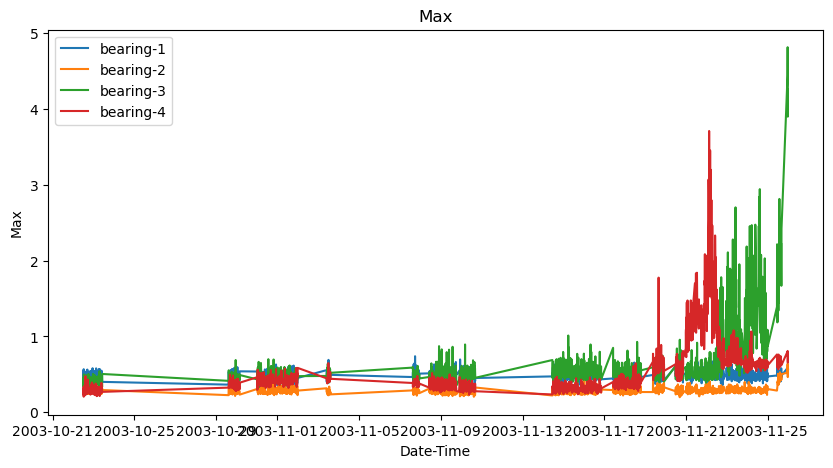

<class 'pandas.core.series.Series'>


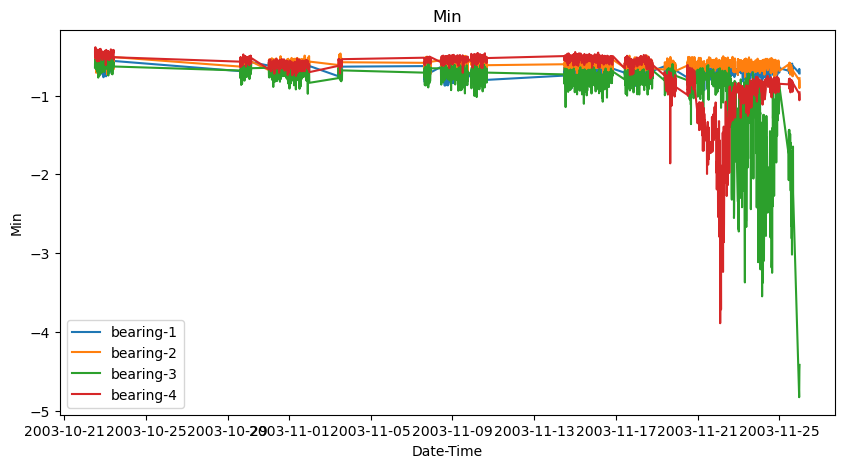

<class 'pandas.core.series.Series'>


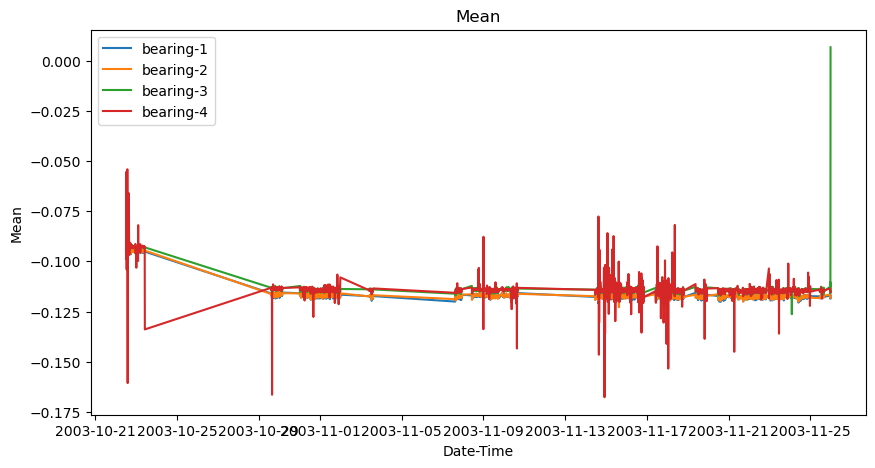

<class 'pandas.core.series.Series'>


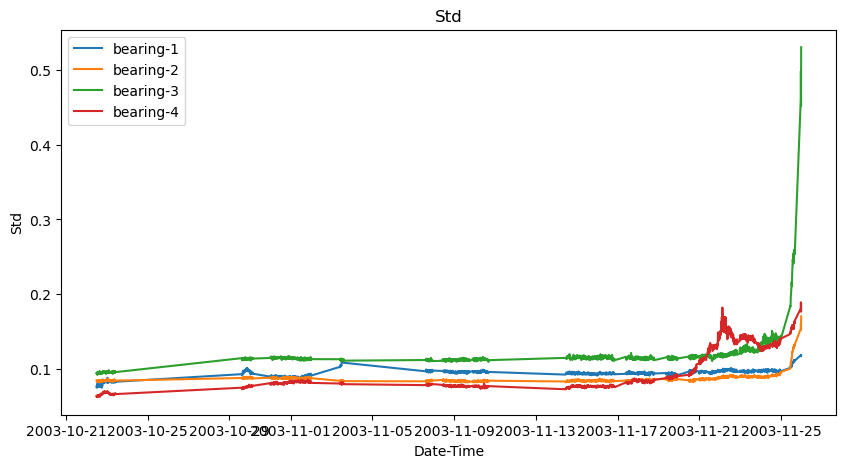

<class 'pandas.core.series.Series'>


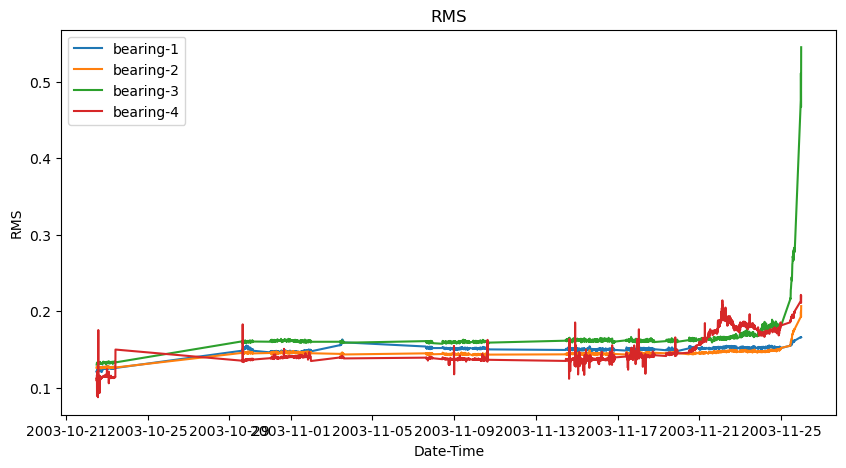

<class 'pandas.core.series.Series'>


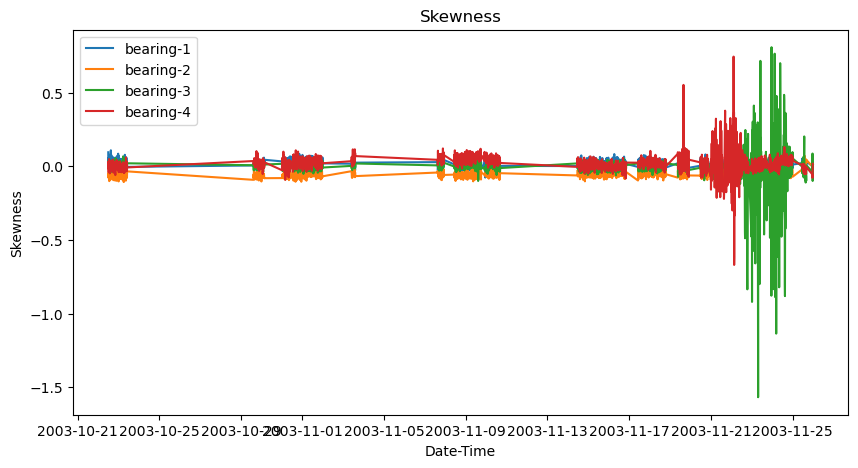

<class 'pandas.core.series.Series'>


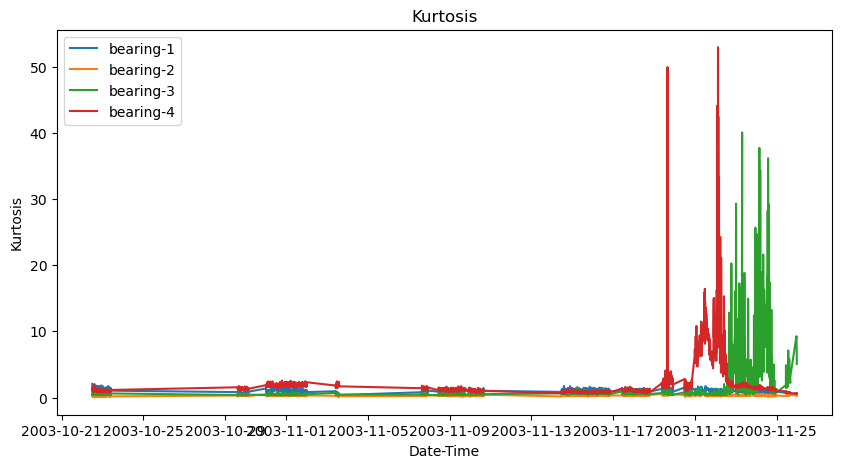

<class 'pandas.core.series.Series'>


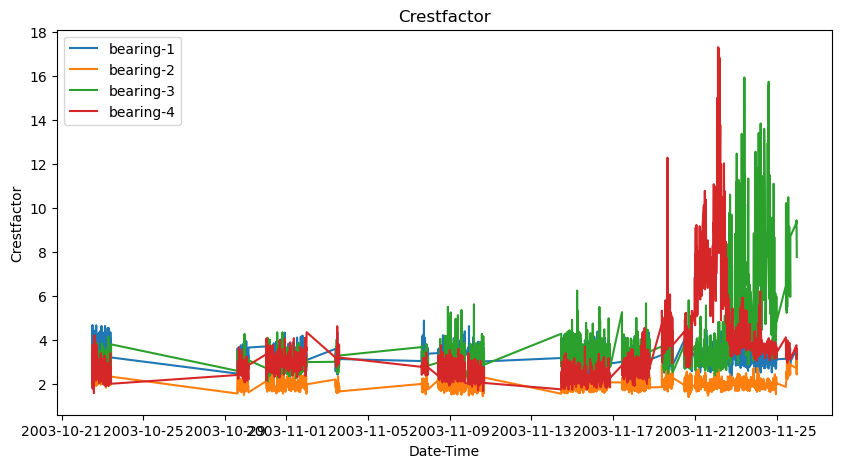

<class 'pandas.core.series.Series'>


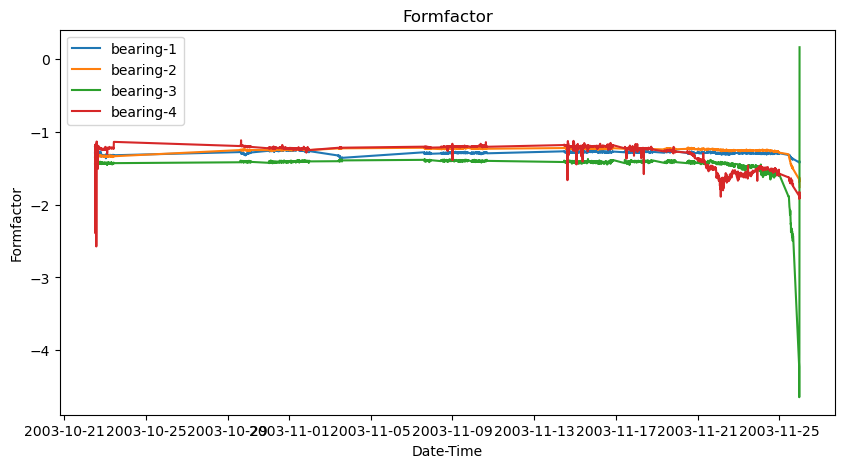

<class 'pandas.core.series.Series'>


In [13]:

for i,col in enumerate(df1.columns):  
    
        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()
        
        print(type(df1[col]))

# Inner Race Fault 

In [8]:
df_irf=df3['2003-11-21 00:32:00':'2003-11-24 18:22:00']
fault=[]
for i in range (0,len(df_irf)):
    fault.append('Inner Race')

df_irf['Fault']=fault
df_irf

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_20448\1442353547.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_irf['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crestfactor,Formfactor,Fault
2003-11-21 00:34:03,0.4220,-0.8130,-0.114544,0.114849,0.162208,0.006259,0.593138,2.602068,-1.416106,Inner Race
2003-11-21 00:44:03,0.5275,-0.8250,-0.114132,0.114445,0.161636,-0.011962,0.684311,3.269580,-1.416240,Inner Race
2003-11-21 00:54:03,0.5240,-0.7140,-0.113960,0.114761,0.161746,0.037218,0.469406,3.250156,-1.419357,Inner Race
2003-11-21 01:04:03,0.6005,-0.7390,-0.114462,0.112817,0.160727,0.012655,0.768857,3.747064,-1.404283,Inner Race
2003-11-21 01:14:03,0.5985,-0.7190,-0.115218,0.115966,0.163484,-0.022894,0.660286,3.652781,-1.418928,Inner Race
...,...,...,...,...,...,...,...,...,...,...
2003-11-24 17:37:32,0.7605,-1.0500,-0.115377,0.138015,0.179888,-0.057098,1.111082,4.227173,-1.559130,Inner Race
2003-11-24 17:47:32,1.7870,-2.2720,-0.114475,0.147438,0.186661,-0.169453,13.266380,9.548757,-1.630592,Inner Race
2003-11-24 17:57:32,1.4405,-1.6455,-0.113353,0.144959,0.184015,0.047087,3.511565,7.827709,-1.623375,Inner Race
2003-11-24 18:07:32,1.0790,-1.5650,-0.114312,0.138728,0.179754,0.009007,2.805597,6.002405,-1.572492,Inner Race


In [9]:
df_irf.to_csv('inner_race_fault.csv',index=False)

# Roller Element Fault

In [10]:
df_ref=df4['2003-11-21 00:32:00':'2003-11-24 18:22:00']
fault=[]
for i in range (0,len(df_ref)):
    fault.append('Roller Element')

df_ref['Fault']=fault
df_ref

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_20448\1836188734.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crestfactor,Formfactor,Fault
2003-11-21 00:34:03,1.0790,-1.2570,-0.114330,0.106033,0.155954,0.052962,6.342642,6.928500,-1.364281,Roller Element
2003-11-21 00:44:03,1.1485,-1.1755,-0.113896,0.109625,0.158091,0.055393,6.809249,7.265126,-1.388117,Roller Element
2003-11-21 00:54:03,1.4490,-1.1805,-0.113594,0.110708,0.158616,0.154832,9.259709,9.098084,-1.396335,Roller Element
2003-11-21 01:04:03,0.8255,-1.1385,-0.114474,0.105680,0.155805,-0.098626,5.176750,5.312137,-1.360970,Roller Element
2003-11-21 01:14:03,1.0570,-1.2000,-0.117033,0.109034,0.159952,0.036153,5.777172,6.616105,-1.366757,Roller Element
...,...,...,...,...,...,...,...,...,...,...
2003-11-24 17:37:32,0.6360,-0.8215,-0.114274,0.134403,0.176426,0.067830,1.292791,3.609385,-1.543961,Roller Element
2003-11-24 17:47:32,0.5945,-0.7825,-0.114281,0.131371,0.174157,0.033719,1.293530,3.412258,-1.524060,Roller Element
2003-11-24 17:57:32,0.6460,-0.8205,-0.113587,0.131056,0.173459,0.035932,1.335465,3.723053,-1.527302,Roller Element
2003-11-24 18:07:32,0.6920,-0.7790,-0.114356,0.132124,0.174755,0.052000,1.139499,3.966227,-1.528189,Roller Element


In [11]:
df_ref.to_csv('roller_element_fault.csv',index=False)

# Loading featue engineered set2 data

In [12]:
test_no=2

df1 = pd.read_csv("Time_feature_matrix_bearing_1_Test_ {}.csv".format(test_no),index_col='Unnamed: 0')
df2 = pd.read_csv("Time_feature_matrix_bearing_2_Test_ {}.csv".format(test_no),index_col='Unnamed: 0')
df3 = pd.read_csv("Time_feature_matrix_bearing_3_Test_ {}.csv".format(test_no),index_col='Unnamed: 0')
df4 = pd.read_csv("Time_feature_matrix_bearing_4_Test_ {}.csv".format(test_no),index_col='Unnamed: 0')


# Set-2 Visualization

Channel Arrangement: Bearing 1 – Ch 1; Bearing2 – Ch 2; Bearing3 – Ch3; Bearing 4 – Ch 4.<br>
At the end of the test-to-failure experiment, outer race failure occurred in bearing 1.<br>

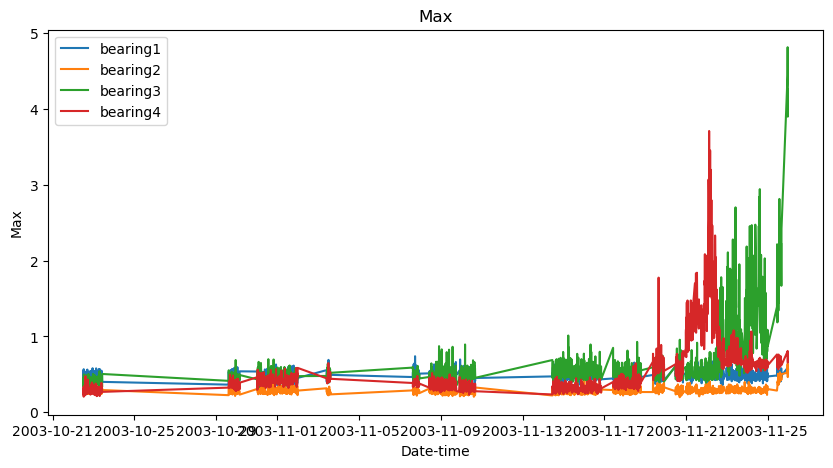

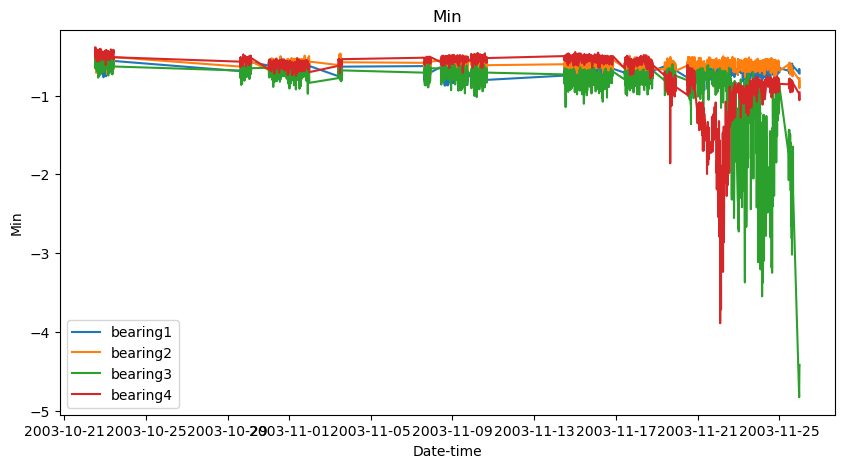

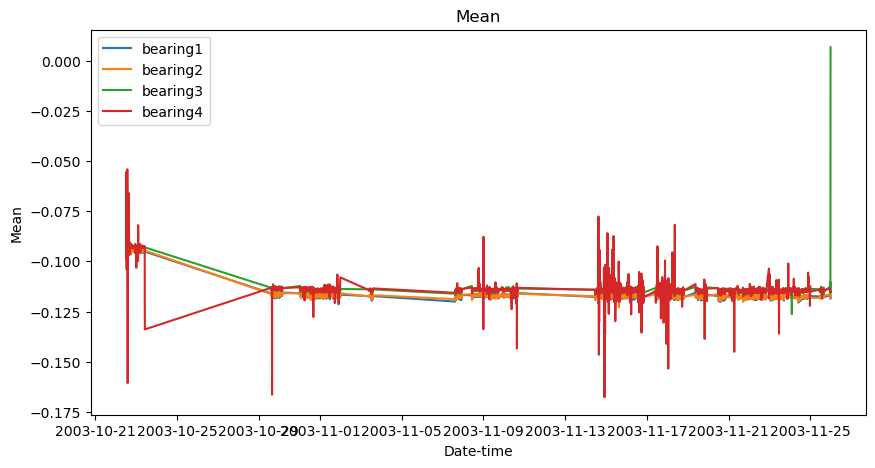

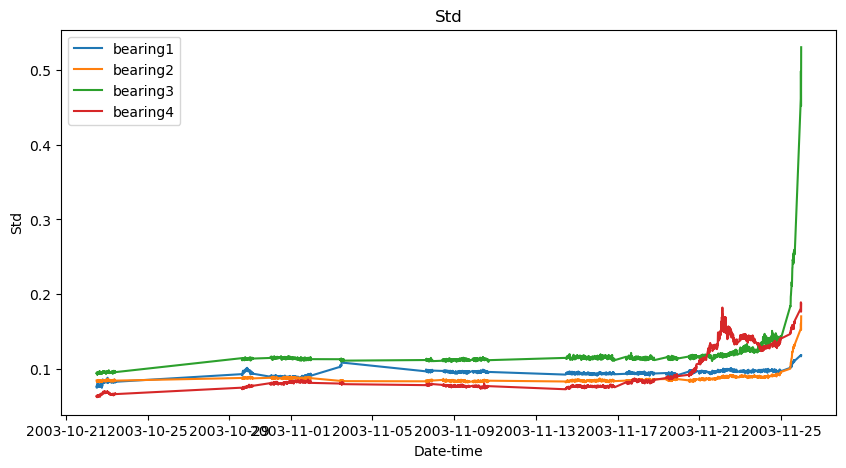

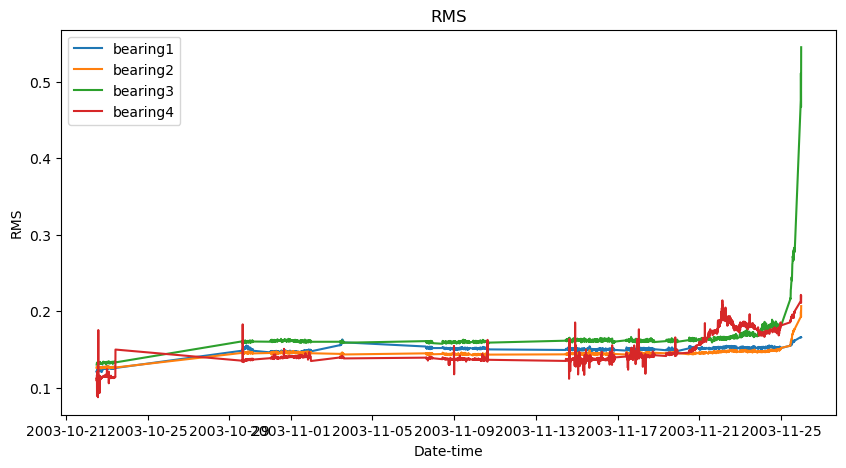

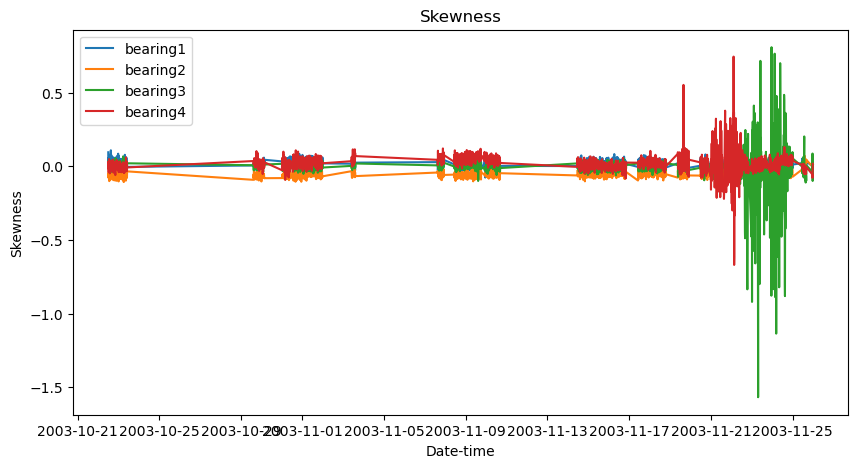

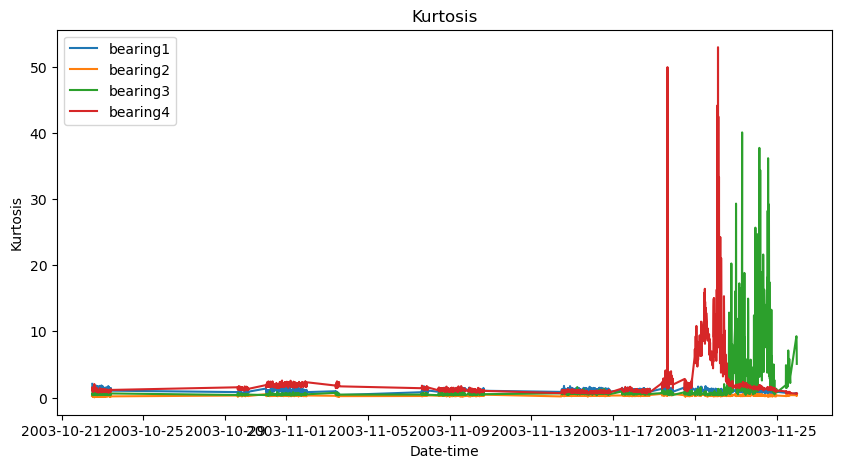

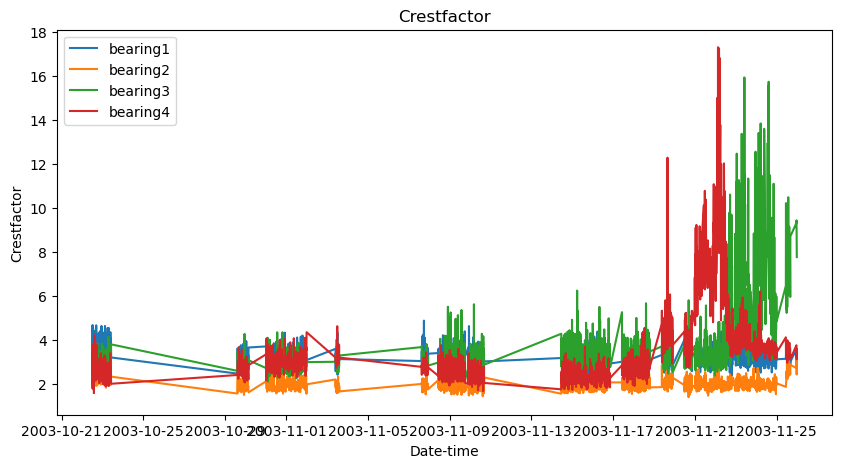

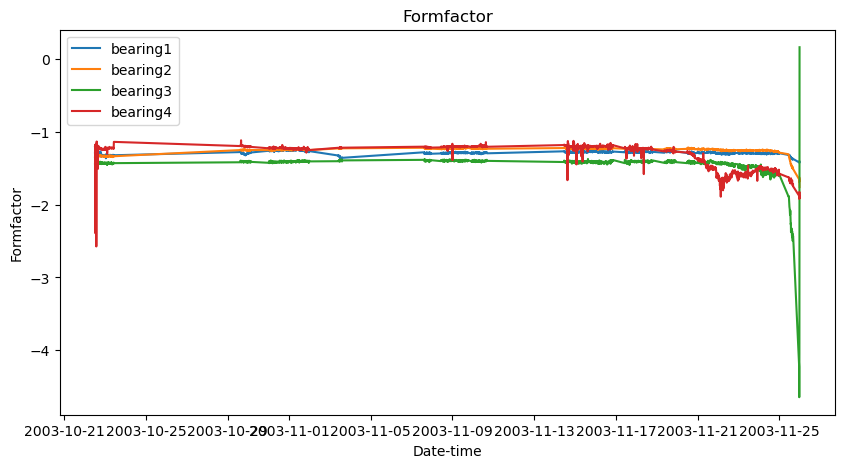

In [15]:
for col in (df1.columns):
    plt.figure(figsize=(10,5))
    plt.plot(df1.index,df1[col])
    plt.plot(df1.index,df2[col])
    plt.plot(df1.index,df3[col])
    plt.plot(df1.index,df4[col])
    
    plt.legend(['bearing1','bearing2','bearing3','bearing4'])
    
    plt.xlabel("Date-time")
    plt.ylabel(col)
    plt.title(col)
    plt.show()

# Saving Outer Race Fault

In [14]:
df_orf=df1['2004-02-17 12:32:00':'2004-02-19 00:42:00']
fault=[]
for i in range (0,len(df_orf)):
    fault.append('Outer Race')

df_orf['Fault']=fault

df_orf.to_csv('outer_race_fault_test_2.csv',index=False)  
df_orf

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_20448\3318812895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orf['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crestfactor,Formfactor,Fault
2004-02-17 12:32:00,0.789,-0.781,-0.001874,0.162117,0.162124,-0.076375,2.539286,4.866637,-86.515839,Outer Race
2004-02-17 12:42:00,0.803,-0.723,-0.001712,0.155821,0.155826,-0.087399,2.463552,5.153178,-91.001170,Outer Race
2004-02-17 12:52:00,0.879,-0.725,-0.002833,0.156768,0.156790,-0.082349,2.397298,5.606226,-55.341134,Outer Race
2004-02-17 13:02:00,0.784,-0.754,-0.002073,0.154166,0.154177,-0.050836,2.380468,5.085081,-74.391213,Outer Race
2004-02-17 13:12:00,0.854,-0.698,-0.001955,0.155019,0.155028,-0.079743,2.385198,5.508694,-79.314679,Outer Race
...,...,...,...,...,...,...,...,...,...,...
2004-02-19 00:02:00,0.955,-1.118,-0.001586,0.215437,0.215437,-0.080072,1.458276,4.432845,-135.796235,Outer Race
2004-02-19 00:12:00,0.710,-1.021,-0.001834,0.183846,0.183851,-0.146662,0.885198,3.861822,-100.230775,Outer Race
2004-02-19 00:22:00,0.693,-0.728,-0.001688,0.163871,0.163876,0.120602,0.264161,4.228812,-97.072275,Outer Race
2004-02-19 00:32:00,0.647,-0.696,-0.002102,0.158311,0.158321,0.053990,0.326583,4.086625,-75.329810,Outer Race


In [15]:
df_orf.to_csv('outer_race_fault_test_2.csv',index=False)

# Loading featue engineered set3 data

In [16]:
test_no=3

df1 = pd.read_csv("Time_feature_matrix_bearing_1_Test_ {}.csv".format(test_no),index_col='Unnamed: 0')
df2 = pd.read_csv("Time_feature_matrix_bearing_2_Test_ {}.csv".format(test_no),index_col='Unnamed: 0')
df3 = pd.read_csv("Time_feature_matrix_bearing_3_Test_ {}.csv".format(test_no),index_col='Unnamed: 0')
df4 = pd.read_csv("Time_feature_matrix_bearing_4_Test_ {}.csv".format(test_no),index_col='Unnamed: 0')


# Set-3 Visualization

Bearing1 – Ch 1; Bearing2 – Ch 2; Bearing3 – Ch3; Bearing4 – Ch4.<br>
At the end of the test-to-failure experiment, outer race failure occurred in bearing 3.<br>

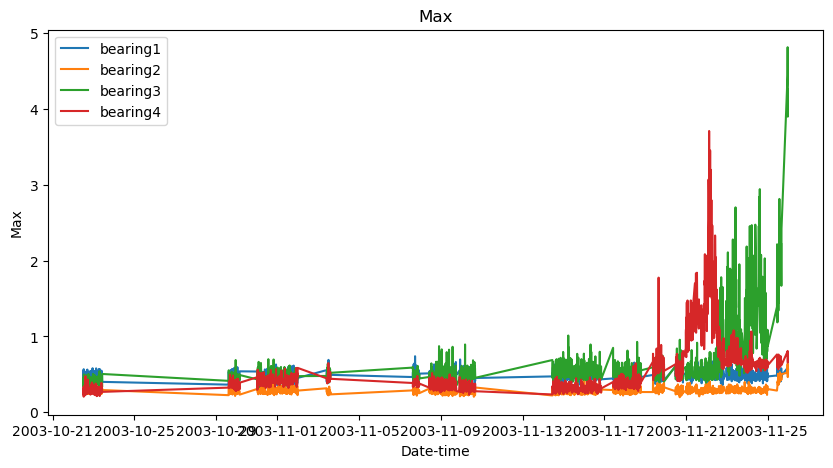

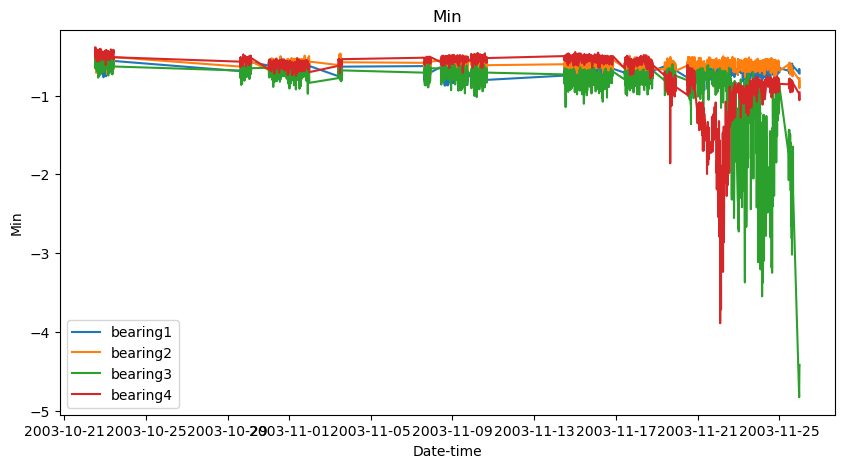

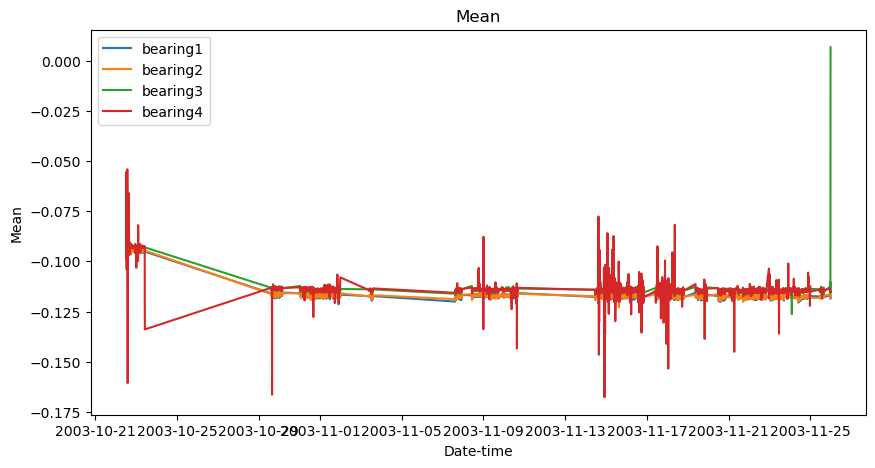

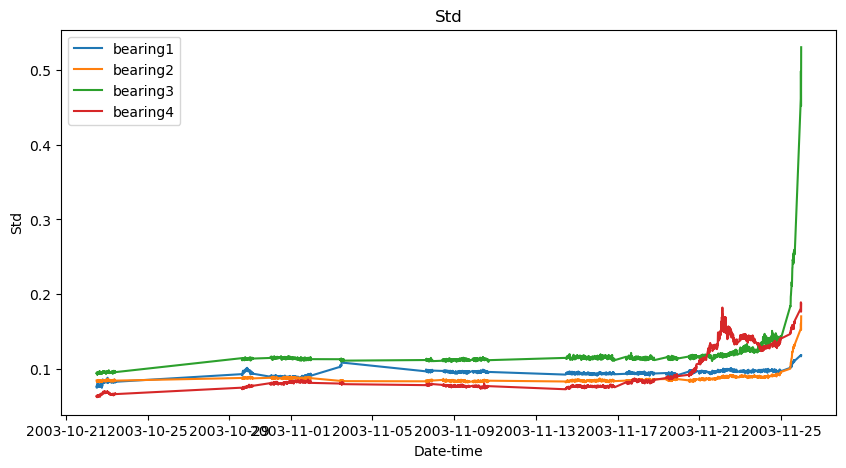

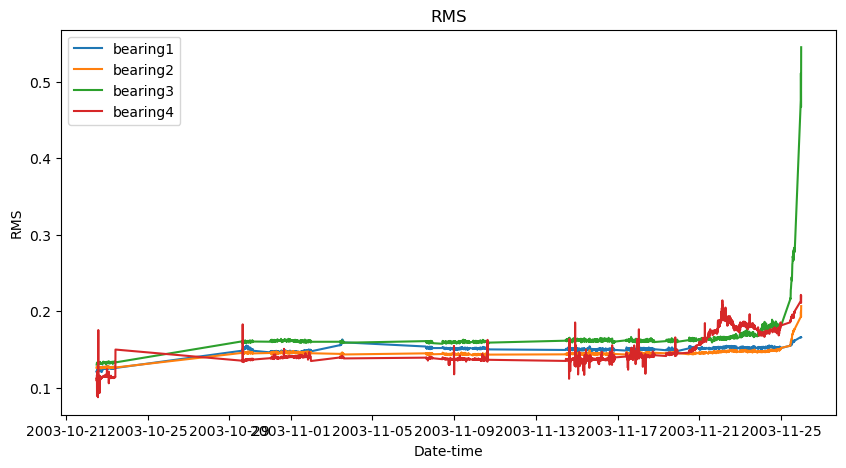

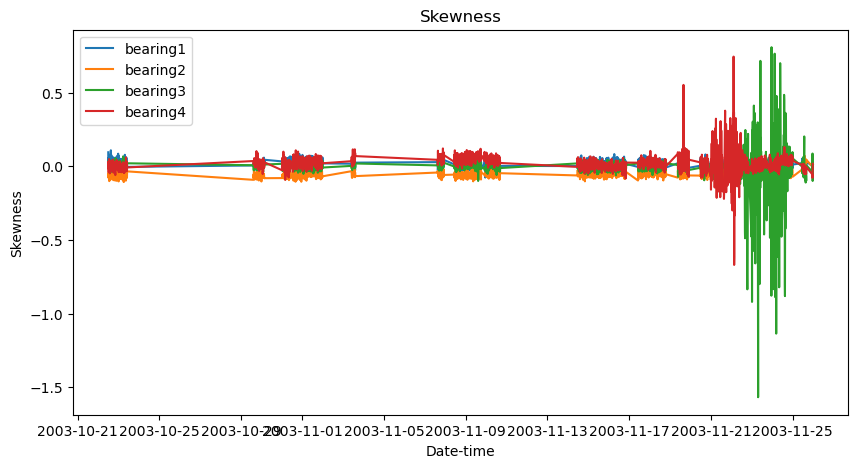

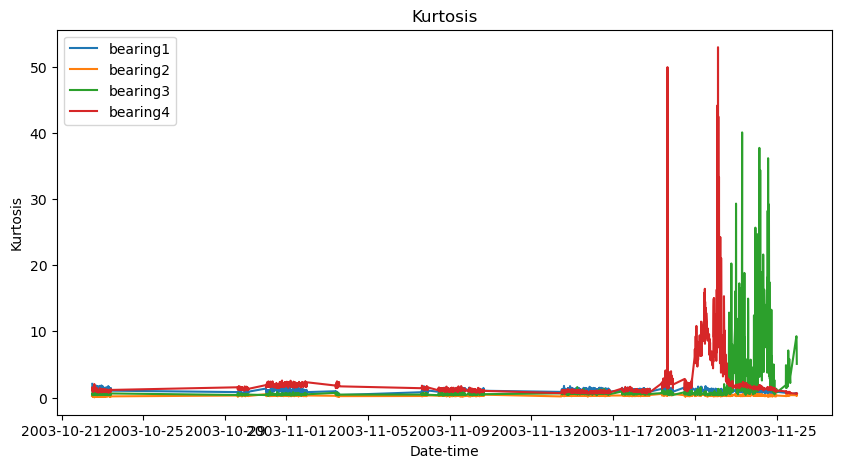

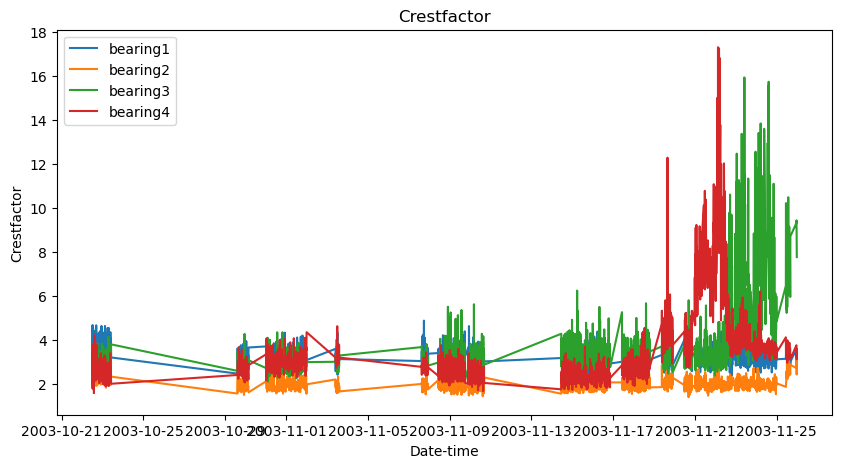

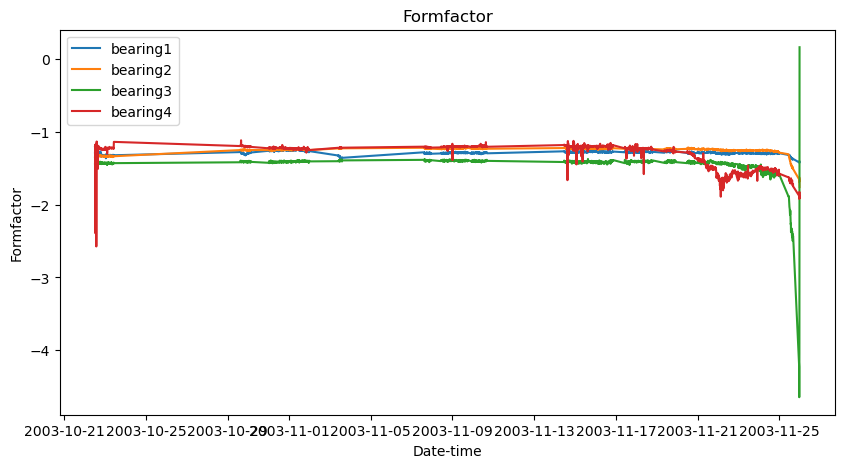

In [16]:
for col in (df1.columns):
    plt.figure(figsize=(10,5))
    plt.plot(df1.index,df1[col])
    plt.plot(df1.index,df2[col])
    plt.plot(df1.index,df3[col])
    plt.plot(df1.index,df4[col])
    
    plt.legend(['bearing1','bearing2','bearing3','bearing4'])
    
    plt.xlabel("Date-time")
    plt.ylabel(col)
    plt.title(col)
    plt.show()

# Saving Outer Race Fault

In [19]:
df_orf=df3['2004-04-15 12:32:00':'2004-04-18 00:42:00']
fault=[]
for i in range (0,len(df_orf)):
    fault.append('Outer Race')

df_orf['Fault']=fault
 
df_orf

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_20448\566577149.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orf['Fault']=fault


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crestfactor,Formfactor,Fault
2004-04-15 12:32:00,0.315,-0.300,-0.002260,0.071999,0.072032,-0.017350,0.161074,4.373034,-31.867085,Outer Race
2004-04-15 12:42:00,0.278,-0.320,-0.000929,0.071960,0.071965,-0.020822,0.203632,3.863014,-77.468263,Outer Race
2004-04-15 12:52:00,0.403,-0.300,-0.001721,0.071967,0.071986,0.009853,0.275335,5.598312,-41.838775,Outer Race
2004-04-15 13:02:00,0.334,-0.332,-0.001242,0.070479,0.070488,0.037436,0.131765,4.738400,-56.769549,Outer Race
2004-04-15 13:12:00,0.295,-0.334,-0.002482,0.072242,0.072283,-0.030286,0.181303,4.081162,-29.120361,Outer Race
...,...,...,...,...,...,...,...,...,...,...
2004-04-18 00:02:00,2.280,-3.936,-0.001821,0.394083,0.394077,-0.416217,6.095530,5.785668,-216.407494,Outer Race
2004-04-18 00:12:00,1.750,-3.423,-0.002377,0.395931,0.395928,-0.664070,3.988261,4.419990,-166.549208,Outer Race
2004-04-18 00:22:00,2.202,-3.013,-0.004019,0.384375,0.384387,-0.150122,2.377175,5.728602,-95.651873,Outer Race
2004-04-18 00:32:00,1.824,-3.335,-0.003547,0.373875,0.373883,-0.408740,4.726666,4.878529,-105.403295,Outer Race


In [20]:
df_orf.to_csv('outer_race_fault_test_3.csv',index=False)

# Saving normal values

In [22]:
Test=[1,2,3]
Bearing_No=[1,2,3,4]

df_normal_bearing = pd.DataFrame()

for test_no in Test:
    for bearing_no in Bearing_No:
        temp = pd.read_csv("Time_feature_matrix_bearing_{}_Test_ {}.csv".format(bearing_no,test_no),index_col='Unnamed: 0')

        starting = np.floor(len(temp)*.21)
        ending = np.floor(len(temp)*.23)

        start_time = temp.index[starting]
        end_time = temp.index[ending]

        temp = temp[start_time:end_time]
        
        df_normal_bearing=df_normal_bearing.append(temp)

fault=[]
for i in range (0,len(df_normal_bearing)):
    fault.append('Normal')

df_normal_bearing['Fault']=fault

df_normal_bearing

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_20448\1048911569.py:13: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  start_time = temp.index[starting]
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_20448\1048911569.py:14: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  end_time = temp.index[ending]
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_20448\1048911569.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_normal_bearing=df_normal_bearing.append(temp)
C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_20448\1048911569.py:13: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to 

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crestfactor,Formfactor,Fault
2003-11-01 14:01:44,0.5520,-0.5640,-0.117152,0.088715,0.146993,0.042514,0.975709,3.774804,-1.254731,Normal
2003-11-01 14:11:44,0.4175,-0.6130,-0.117766,0.088628,0.147432,0.031653,1.020460,2.832186,-1.251913,Normal
2003-11-01 14:21:44,0.4415,-0.5855,-0.117079,0.087172,0.146011,0.056889,0.932320,3.021907,-1.247192,Normal
2003-11-01 14:31:44,0.4980,-0.6240,-0.116931,0.089763,0.147452,0.004492,1.038105,3.398210,-1.260966,Normal
2003-11-01 14:41:44,0.4390,-0.5910,-0.117736,0.087695,0.146865,-0.011644,0.765244,2.981301,-1.247379,Normal
...,...,...,...,...,...,...,...,...,...,...
2004-03-14 11:02:00,0.2760,-0.2440,-0.003381,0.051343,0.051453,0.050065,0.367385,5.364090,-15.216136,Normal
2004-03-14 11:12:00,0.2440,-0.2950,-0.002698,0.051048,0.051118,-0.017866,0.357546,4.773283,-18.945901,Normal
2004-03-14 11:22:00,0.2340,-0.2220,-0.003480,0.051675,0.051791,0.039894,0.298893,4.518154,-14.882157,Normal
2004-03-14 11:32:00,0.2250,-0.2120,-0.003334,0.052118,0.052223,0.005201,0.253224,4.308406,-15.661694,Normal


In [23]:
df_normal_bearing.to_csv('Normal_Bearing.csv',index=False)